## Μετασχηματιστές και Εκτιμητές στο scikit-learn

Οι μετασχηματιστές έχουν δύο βασικές μεθόδους, την fit και την transform. Με την fit μαθαίνουν κάποιες παραμέτρους με βάση τα δεδομένα train και με την transform μπορούν να μετασχηματίσουν τα δεδομένα (train ή test) βάσει των παραμέτρων που έχουν μάθει.
![alt text](https://i.imgur.com/uqtJyI8.jpg)

Η δεύτερη μεγάλη κλάση του scikit learn είναι οι εκτιμητές (**estimators**). Αυτό που τους διαφοροποιεί από τους μετασχηματιστές είναι ότι ενώ έχουν τις δικές τους μεθόδους fit και σε κάποιες περιπτώσεις και transform, έχουν επιπλέον τη μέθοδο predict, που κάνει τις προβλέψεις πάνω στα δεδομένα του test set. Οι ταξινομητές στην επιβλεπόμενη μάθηση είναι λοιπόν όλοι τους εκτιμητές, εφόσον κάνουν fit πάνω στα δεδομένα train και predict στα δεδομένα test.

![alt text](https://i.imgur.com/jhExL9i.jpg)

Θα δούμε στη συνέχεια ότι μπορούμε να σχηματίζουμε αλυσίδες πολλών διαδοχικών μετασχηματιστών που καταλήγουν σε έναν εκτιμητή, τα λεγόμενα pipelines.

## Pipelines

Μια διαδικασία ML ή workflow ή pipeline αποτελείται από μια σειρά μετασχηματιστών πάνω στα χαρακτηριστικά των δεδομένων και καταλήγει σε έναν εκτιμητή.

Οι μετασχηματιστές χρησιμοποιούνται για να κάνουν την προεπεξεργασία (μέσω μετασχηματισμού) των δεδομένων. 

Στο προηγούμενο εργαστήριο είδαμε κάποιες μεθόδους μείωσης διαστάσεων και επιλογής χαρακτηριστικών. Και οι δύο αυτές μέθοδοι τείνουν να μειώσουν τον αριθμό των χαρακτηριστικών στο σύνολο δεδομένων.Οι μέθοδοι μείωσης διαστάσεων το κάνουν δημιουργώντας νέους συνδυασμούς χαρακτηριστικών (μερικές φορές γνωστές ως μετασχηματισμός χαρακτηριστικών), ενώ οι μέθοδοι επιλογής χαρακτηριστικών περιλαμβάνουν και εξαιρούν χαρακτηριστικά που υπάρχουν στα δεδομένα χωρίς να τα αλλάζουν.

Οι μετασχηματιστές γενικά έχουν και αυτοί υπερ-παραμέτρους που επηρεάζουν τη λειτουργία τους π.χ.ο VarianceThreshold είχε το κατώτερο κατώφλι διακύμανσης ο PCA τον αριθμό των κύριων συνιστωσών

Η επιλογή των υπερ-παραμέτρων γίνεται μόνο εμπειρικά και μέσω της διασταυρούμενης επικύρωσης (cross-validation) μπορούμε να λάβουμε καλύτερα αποτελέσματα.



<img src="https://github.com/rasbt/pattern_classification/raw/master/Images/supervised_learning_flowchart.png" width="65%">

Έτσι, για να βελτιώσουμε τη απόδοση του μοντέλου μας, χρησιμοποιούμε Διασταυρούμενη Επικύρωσης (Cross-Validation) στο σετ εκπαίδευσης.

Μία από τις πιο κοινές μεθόδους Cross-Validation είναι η K-Fold Validation. 

Στο K-Fold, διαιρούμε το σύνολο δεδομένων μας σε Ν τμήματα και στη συνέχεια εκπαιδεύουμε επαναληπτικά το μοντέλο μας χρησιμοποιώντας Ν-1 τμήματα και το ελέγχουμε χρησιμοποιώντας το αριστερό τμήμα (σε κάθε επανάληψη αλλάζουμε το αριστερό τμήμα). Αφού εκπαιδεύσουμε N φορές το μοντέλο μας, μετράμε στη συνέχεια τα αποτελέσματα της εκπαίδευσης που λαμβάνονται σε κάθε επανάληψη για να λάβουμε τα συνολικά αποτελέσματα της εκπαίδευσής μας.

<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png"  width="60%" height="60%" />


Η χρήση διασταυρούμενης επικύρωσης κατά την εφαρμογή της βελτιστοποίησης υπερπαραμέτρων μπορεί να είναι πολύ σημαντική. Με αυτόν τον τρόπο, ενδέχεται να αποφύγουμε τη χρήση ορισμένων υπερπαραμέτρων που λειτουργούν πολύ καλά στα δεδομένα εκπαίδευσης αλλά όχι τόσο καλά με τα δεδομένα δοκιμής.


# Παράμετροι μοντέλων μηχανικής μάθησης
Τα μοντέλα μηχανικής μάθησης απαρτίζονται από δύο διαφορετικούς τύπους παραμέτρων:

* **Υπερπαράμετροι (Hyperparameters)**

Είναι όλες οι παράμετροι που μπορούν να ρυθμιστούν αυθαίρετα από το χρήστη πριν ξεκινήσει η εκπαίδευση  του μοντέλου (π.χ. αριθμός εκτιμητών στο Random Forest) και καθορίζουν τον τρόπο δομής του μοντέλου μας.

* **Παράμετροι μοντέλου (Model parameters)**

Μαθαίνονται κατά τη διάρκεια της εκπαίδευσης του μοντέλου (π.χ. βάρη στα νευρωνικά δίκτυα, κτλ) και καθορίζουν τον τρόπο χρήσης των δεδομένων εισόδου ώστε να ληφθεί η επιθυμητή έξοδο και μαθαίνονται κατά την εκπαίδευση. 

H ταυτόχρονη ρύθμιση (tuning) των υπερπαραμέτρων καθώς και των παραμέτρων των μοντέλων είναι ένας τύπος προβλήματος βελτιστοποίησης. 

Έχουμε ένα σύνολο υπερπαραμέτρων και στοχεύουμε να βρούμε το σωστό συνδυασμό των τιμών τους που θα μας βοηθήσουν να βρούμε είτε την ελάχιστη (π.χ. απώλεια) είτε τη μέγιστη (π.χ. ακρίβεια) μιας συνάρτησης.

Αυτό μπορεί να είναι ιδιαίτερα σημαντικό κατά τη σύγκριση της απόδοσης διαφορετικών μοντέλων μηχανικής μάθησης σε ένα σύνολο δεδομένων.

## Προσεγγίσεις για τη βελτιστοποίηση υπερπαραμέτρων (Hyperparameter optimization)

* Χειροκίνητη αναζήτηση (Manual Search)
* Τυχαία αναζήτηση (Random Search)
* Αναζήτηση πλέγματος (Grid Search)
* Αυτόματη ρύθμιση υπερπαραμέτρων (Bayesian Optimization, Genetic Algorithms)
* Ρύθμιση Artificial Neural Networks (ANNs) 



Το σύνολο δεδομένων που θα χρησιμοποιήσουμε είναι το Kaggle Credit Card Fraud Detection.

Στόχος μας είναι να ταξινομήσουμε σωστά τις συναλλαγές με πιστωτική κάρτα σε γνήσιες και μη γνήσιες (δυαδική ταξινόμηση). Θα χρησιμοποιήσουμε έναν περιορισμένο αριθμό χαρακτηριστικών από αυτό το σύνολο.

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

In [ ]:
print(raw_df.shape)
print(raw_df.columns)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
percent_missing = raw_df.isnull().sum() * 100 / len(raw_df)
missing_values = pd.DataFrame({'percent_missing': percent_missing}) 
missing_values.sort_values(by ='percent_missing' , ascending=False)

percent_missing
Time                0.0
V16                 0.0
Amount              0.0
V28                 0.0
V27                 0.0
V26                 0.0
V25                 0.0
V24                 0.0
V23                 0.0
V22                 0.0
V21                 0.0
V20                 0.0
V19                 0.0
V18                 0.0
V17                 0.0
V15                 0.0
V1                  0.0
V14                 0.0
V13                 0.0
V12                 0.0
V11                 0.0
V10                 0.0
V9                  0.0
V8                  0.0
V7                  0.0
V6                  0.0
V5                  0.0
V4                  0.0
V3                  0.0
V2                  0.0
Class               0.0

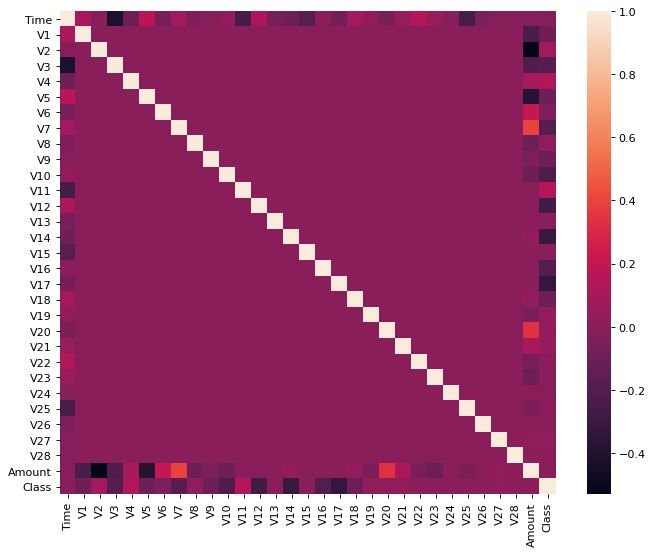

In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

corr=raw_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [ ]:
#Κρατάμε ένα τμήμα του αρχικού dataset πάνω στο οποίο θα δουλέψουμε 
df2 = raw_df[raw_df.Class == 1][0:450]
print(df2.shape)
df3 = raw_df[raw_df.Class == 0][0:450]
print(df3.shape)

df = df2.append(df3, ignore_index=True)
#df4.head()
df.shape

(450, 31)
(450, 31)


(900, 31)

In [ ]:
df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   406.0 -2.312227  1.951992 -1.609851  ...  0.261145 -0.143276    0.00      1
1   472.0 -3.043541 -3.157307  1.088463  ... -0.252773  0.035764  529.00      1
2  4462.0 -2.303350  1.759247 -0.359745  ...  0.039566 -0.153029  239.93      1
3  6986.0 -4.397974  1.358367 -2.592844  ... -0.827136  0.849573   59.00      1
4  7519.0  1.234235  3.019740 -4.304597  ... -0.010016  0.146793    1.00      1

[5 rows x 31 columns]

In [ ]:
X= df.drop(['Class'], axis = 1).values
Y = df['Class']

X = StandardScaler().fit_transform(X)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

print(X_Train,'\n')

print(X.shape,'\n', X_Train.shape,'\n', X_Test.shape)

[[-7.70121128e-01  6.63715437e-01 -7.30180207e-01 ...  2.71362876e-03
   2.65934078e-02 -1.13245680e-01]
 [-7.66150728e-01  3.29126869e-01 -3.74069907e-01 ... -2.66516655e-02
  -2.31038210e-01 -2.73784228e-01]
 [-7.71570640e-01  3.79436522e-01 -3.14038801e-01 ... -1.53580703e-01
  -4.97755945e-03 -3.74006742e-01]
 ...
 [ 1.37303378e+00 -4.58716878e+00  5.32079916e+00 ... -5.27364836e+00
  -4.61929276e-01 -3.99477199e-01]
 [-7.71108477e-01  3.70351276e-01 -4.21082864e-01 ... -8.92925094e-02
   3.05914764e-01 -3.09625392e-01]
 [-7.65856624e-01  6.92627420e-01 -5.31871199e-01 ... -1.04273833e-01
  -2.37201696e-02 -3.41442721e-01]] 

(900, 30) 
 (630, 30) 
 (270, 30)


Ως ταξινομητή σε αυτό το Notebook θα χρησιμοποιήσουμε ένα  Random Forest Classifier ![](https://www.researchgate.net/profile/Erika_Amstalden_van_Hove/publication/228540194/figure/fig1/AS:301839783350274@1448975620988/The-Random-Forest-classifier-is-an-ensemble-of-decision-trees-where-the-single-trees-are.png) 
[source](https://www.researchgate.net/publication/228540194_Towards_Digital_Staining_using_Imaging_Mass_Spectrometry_and_Random_Forests-Technical_Report)


Οι κύριες παράμετροι που χρησιμοποιούνται από ένα Random Forest Classifier είναι: 
* criterion = η συνάρτηση που χρησιμοποιείται για την αξιολόγηση της ποιότητας ενός διαχωρισμού. 
* max_depth = μέγιστος επιτρεπόμενος αριθμός επιπέδων σε κάθε δέντρο. 
* max_features = μέγιστος αριθμός χαρακτηριστικών που λαμβάνονται υπόψη κατά τον διαχωρισμό ενός κόμβου. 
* min_samples_leaf = ελάχιστος αριθμός δειγμάτων που μπορούν να αποθηκευτούν σε ένα φύλλο δέντρου.
* min_samples_split = ελάχιστος αριθμός δειγμάτων που είναι απαραίτητα σε έναν κόμβο για να προκαλέσει διαχωρισμό κόμβου. 
* n_estimators = αριθμός δέντρων στο σύνολο.



##Χειροκίνητη αναζήτηση (Manual Search) 

Κατά τη χρήση της χειροκίνητης αναζήτησης, επιλέγουμε ορισμένα μοντέλα υπερπαραμέτρων με βάση την κρίση/εμπειρία μας. 

Στη συνέχεια εκπαιδεύουμε το μοντέλο, αξιολογούμε την ακρίβειά του και αρχίζουμε ξανά τη διαδικασία. Αυτός ο βρόχος επαναλαμβάνεται έως ότου σημειωθεί ικανοποιητική ακρίβεια. 



In [ ]:
model = RandomForestClassifier(n_estimators=5, random_state= 101).fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)

print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc1 = accuracy_score(Y_Test,predictionforest)

[[130   0]
 [  1 139]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       130
           1       1.00      0.99      1.00       140

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [ ]:
print(Y_Test)
print(predictionforest)

184    1
532    0
501    0
517    0
871    0
      ..
416    1
196    1
83     1
258    1
432    1
Name: Class, Length: 270, dtype: int64
[1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1
 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0
 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1
 0 0 0 0 0 1 1 1 1 0 1]


Λαμβάνοντας υπόψη μια πραγματική ετικέτα και μια προβλεπόμενη ετικέτα, το πρώτο πράγμα που μπορούμε να κάνουμε είναι να χωρίσουμε τα δείγματά μας σε 4 κατηγορίες:
* True negative  — actual = 0, predicted = 0
* False positive — actual = 0, predicted = 1
* False negative — actual = 1, predicted = 0
* True positive  — actual = 1, predicted = 1


![](https://drive.google.com/uc?id=1gJ5e8GUiwcRwfiVuTLiGkM6bc92Iz2vW)

Μπορούμε να υπολογίσουμε τον πίνακα σύγχυσης (confusion matrix) από το scikit-learn, ο οποίος λαμβάνει ως εισόδους τις πραγματικές ετικέτες και τις προβλεπόμενες ετικέτες (confusion_matrix (df.actual_label.values, df.predicted_RF.values)).

Στο παράδειγμά μας True negative =130, False positive = 0,                    False negative = 1  True positive =139


Ας αλλάξουμε τις παραμέτρους στο ταξινομητή και να ελέγξουμε την ακρίβεια του μοντέλου μας:

In [ ]:
model = RandomForestClassifier(n_estimators= 200, max_features = "log2", min_samples_leaf = 30, random_state= 101).fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)

print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc2 = accuracy_score(Y_Test,predictionforest)

[[130   0]
 [  5 135]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       130
           1       1.00      0.96      0.98       140

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



Παρατηρούμε τις τιμές του πίνακα σύγχυσης μετά τις αλλαγές στις παραμέτρους του ταξινομητή. Έχουν εντοπιστεί 3 δείγματα False Negative. 

## Τυχαία Αναζήτηση (Random Search)

Στην τυχαία αναζήτηση, δημιουργούμε ένα πλέγμα υπερπαραμέτρων και εκπαιδεύουμε / δοκιμάζουμε το μοντέλο μας σε έναν τυχαίο συνδυασμό αυτών των υπερπαραμέτρων.

Το RandomizedSearchCV εφαρμόζει μια μέθοδο «προσαρμογής» και μια μέθοδο «πρόβλεψης», βελτιστοποιώντας τις παράμετρους του ταξινομητή που χρησιμοποιείται για την πρόβλεψη μέσω διασταυρούμενης επικύρωσης. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = {
    'max_features': ['auto', 'sqrt','log2', None],
    'n_estimators': list(np.linspace(1, 250, 120, dtype = int))
    }

In [ ]:
clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1) 
 
 #verbose:Controls the verbosity: the higher, the more messages, 
 #n_jobs:int, default=1 ,Number of jobs to run in parallel. 
 # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

model.fit(X_Train,Y_Train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
preds = model.predict(X_Test)

print(confusion_matrix(Y_Test,preds))
print(classification_report(Y_Test,preds))
acc3 = accuracy_score(Y_Test,preds)

[[130   0]
 [  0 140]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       140

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



## Αναζήτηση πλέγματος (Grid Search)

Η απόδοση όλων των πιθανών συνδυασμών υπερ-παραμέτρων μετασχηματιστών και εκτιμητή γίνεται με αναζήτηση πλέγματος (grid search). Ορίζουμε για κάθε παράμετρο ένα πεδίο ορισμού, συνήθως με ελάχιστο, μέγιστο και κάποιο βήμα και φτιάχνουμε ένα πλέγμα με όλους τους πιθανούς συνδυασμούς τιμών των παραμέτρων. 

Για κύριες συνιστώσες PCA (transformer) από 5 μέχρι 15 με βήμα 5 και για έναν RFC (estimator) με  n_estimators δηλαδή ο αριθμός δέντρων στο σύνολο από 1 μέχρι 5 με βήμα 2 παίρνουμε το ακόλουθο grid:

|     |       |        |        |
|-----|-------|--------|--------|
|     | PC=5  | PC=10  | PC=15  |
| n=1 | (1,5) | (1,10) | (1,15) |
| n=3 | (3,5) | (3,10) | (3,15) |
| n=5 | (5,5) | (5,10) | (5,15) |

Για κάθε τιμή υπερπαραμέτρων του grid θα πρέπει να υπολογιστεί ο μέσος όρος του εκτιμητή σε όλα τα folds του cross-validation με βάση το metric (πχ F1) και να επιλεχθεί ο καλύτερος συνδυασμός παραμέτρων. Η συγκεκριμένη στρατηγική αναζήτησης των βέλτιστων υπερπαραμέτρων είναι η εξαντλητική αναζήτηση πλέγματος (exhaustive grid search) και είναι προφανώς πολύ ακριβή υπολογιστικά. Υπάρχουν διάφορες τεχνικές για να περιορίζεται η πολυπλοκότητα του grid search, αλλά δεν το αποφεύγουμε γενικά, γιατί οι υπερπαράμετροι είναι ορίσματα των εκτιμητών και δεν μαθαίνονται από την fit.

Συνοψίζοντας, η βελτιστοποίηση των υπερπαραμέτρων απαιτεί

* έναν εκτιμητή (έναν ταξινομητή)
* τον πεδίο ορισμού των υπερπαραμέτρων
* ένα τρόπο αναζήτησης των πιθανών συνδυασμών τιμών τους πχ grid search
* ένα σχήμα cross-validation πχ 5-fold
* μια μετρική απόδοσης (ή score) πχ F1-macro

Το scikit-learn μας απλοποιεί σε πολύ μεγάλο βαθμό την κατασκευή pipelines και τη βελτιστοποίηση των υπερπαραμέτρων.


Στη συνέχεια θα χρησιμοποιήσουμε την [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) για να βελτιστοποιήσουμε τις υπερπαραμέτρους μας. Η GridSearchCV κάνει μαζί cross-validation και grid search. 

 Την εισάγουμε και θέτουμε τις τιμές ορισμού των υπερπαραμέτρων:

In [ ]:
!pip install --upgrade imbalanced-learn

     |████████████████████████████████| 174kB 2.7MB/s 
     |████████████████████████████████| 6.8MB 8.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
#from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.decomposition import PCA

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
pca = PCA()
rfc=RandomForestClassifier(random_state=42)

pipe = Pipeline(steps=[('pca', pca), ('RFC', clf)])

Το pipeline συμπεριφέρεται ως ένας ενιαίος estimator. Μπορούμε να εφαρμόσουμε fit και predict.

In [ ]:
pipe.fit(X_Train,Y_Train)
preds = pipe.predict(X_Test)
print(confusion_matrix(Y_Test,preds))
print(classification_report(Y_Test, preds))
acc4 = accuracy_score(Y_Test,preds)

[[129   1]
 [  5 135]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       130
           1       0.99      0.96      0.98       140

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



Επειδή ο χώρος αναζήτησης των βέλτιστων υπερπαραμέτρων αρχίζει να μεγαλώνει, ξαναορίζουμε την pipeline με την παράμετρο 'memory': για κάθε fold του crossvalidation και για καθε συνδυασμό υπερπαραμέτρων μετασχηματιστών, τα δεδομένα χρειάζεται να μετασχηματιστούν μία φορά και όχι για κάθε νέα τιμή υπερπαραμέτρων του εκτιμητή. 

Είναι πιθανό στο fit να σας εμφανιστούν κάποια warnings με τη χρήση του memory. Ξανατρέξτε το block του κώδικα.

Μπορούμε να θέτουμε τιμές στις υπερπαραμέτρους των pipelines χρησιμοποιώντας τα ονόματα των estimators, "\_\_", το όνομα της υπερπαραμέτρου, "=" και τις τιμές που της δίνουμε στο grid search. Επίσης μπορούμε να θέσουμε τη μετρική της απόδοσης με την παράμετρο "scoring". Με την παράμετρο "cv" ορίζουμε τον αριθμό των folds. Για βελτιστοποίηση, μπορούμε να θέσουμε την παράμετρο n_jobs=-1 ώστε να χρησιμοποιούνται όλοι οι πυρήνες του υπολογιστή (το default είναι 1).

In [ ]:
#from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.decomposition import PCA

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
pca = PCA()
rfc=RandomForestClassifier(random_state=42)
pipe = Pipeline(steps=[('pca', pca), ('RFC', rfc)], memory = 'tmp')

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = { 
    'pca__n_components': [5, 10, 15,20,25],
    'RFC__max_features': ['auto', 'sqrt', 'log2', None], 
    'RFC__n_estimators': [1, 3, 5, 7, 9]
    }
    

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

Το GridSearchCV είναι επίσης ένας estimator με fit και predict. Ανάλογα το search space η εκτέλεση του  GridSearchCV μπορεί να πάρει αρκετό χρόνο.

In [ ]:
import time
start_time = time.time()
estimator.fit(X_Train, Y_Train)
preds = estimator.predict(X_Test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))

Συνολικός χρόνος fit και predict: 7.946547985076904 seconds


Tυπώνουμε τον καλύτερο estimator και τον καλύτερο συνδυασμό υπερπαραμέτρων:

In [ ]:
print(estimator.best_estimator_)
print(estimator.best_params_)

print(confusion_matrix(Y_Test,preds))
print(classification_report(Y_Test,preds))
acc5=accuracy_score(Y_Test,preds)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('RFC',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=9, n_jobs=None,
                                        oob_score=False, random_state=42,
                       

Η στοχαστικότητα στη διαδικασία της ταξινόμησης οφείλεται στα διαφορετικό διαχωρισμό σε folds σε κάθε επανάληψη. 

## Progressive grid search

Στο πεδίο ορισμού των παραμέτρων, ξεκινάμε με μεγάλα διαστήματα και σχετικά λίγα βήματα. Αν διαπιστώσουμε ότι υπαρχει μια περιοχή τιμών κάποιας παραμέτρου που δίνει καλή  απόδοση μπορούμε να μικρύνουμε το διάστημα του grid search γύρω της και να βάλουμε περισσότερα βήματα.

In [ ]:
#from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.decomposition import PCA

n_components = [15, 17]
max_features= ['log2', None]    
n_estimators= [7, 8]

pca=PCA()
rfc=RandomForestClassifier(random_state=42)
pipe = Pipeline(steps=[('pca', pca), ('RFC', rfc)], memory = 'tmp')


estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, RFC__max_features=max_features, RFC__n_estimators=n_estimators), scoring='f1_macro', n_jobs=-1)
estimator.fit(X_Train, Y_Train)
preds = estimator.predict(X_Test)

print(classification_report(Y_Test, preds))


print(estimator.best_estimator_)
print(estimator.best_params_)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       130
           1       0.99      0.93      0.96       140

    accuracy                           0.96       270
   macro avg       0.96      0.96      0.96       270
weighted avg       0.96      0.96      0.96       270

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=17,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('RFC',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_spl

In [ ]:
print(confusion_matrix(Y_Test,preds))
print(classification_report(Y_Test, preds))
acc6 = accuracy_score(Y_Test,preds)

[[129   1]
 [ 10 130]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       130
           1       0.99      0.93      0.96       140

    accuracy                           0.96       270
   macro avg       0.96      0.96      0.96       270
weighted avg       0.96      0.96      0.96       270



In [ ]:
print(estimator.best_estimator_)
print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=17,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('RFC',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=7, n_jobs=None,
                                        oob_score=False, random_state=42,
                        

Το περισσότερο fine grained grid search, αν δώσει καλύτερες τιμές θα έχει βελτιστοποιήσει τον εκτιμητή, αν όχι, τουλάχιστον θα επιβεβαιώσει ότι είμαστε σε ένα καλό τοπικό μέγιστο της συνάρτησης αξιολόγησης.



## Αυτόματη ρύθμιση υπερπαραμέτρων (Automated Hyperparameter Tuning)

Για την αυτόματη ρύθμιση υπερπαραμέτρων χρησιμοποιούμες τεχνικές όπως: Bayesian Optimization, Gradient Descent και Evolutionary Algorithms.

### Βελτιστοποίηση Bayesian (Bayesian Optimization)

Η Bayesian Optimization μπορεί να πραγματοποιηθεί στην Python χρησιμοποιώντας τη βιβλιοθήκη Hyperopt. Η βελτιστοποίηση Bayesian βασίζεται σε πιθανότητες για να βρει το ελάχιστο μιας συνάρτησης. Ο τελικός στόχος είναι να βρούμε την τιμή εισόδου σε μια συνάρτηση που μπορεί να μας δώσει τη χαμηλότερη δυνατή τιμή εξόδου. 

Η βελτιστοποίηση Bayesian έχει αποδειχθεί πιο αποτελεσματική από το τυχαίο πλέγμα ή τη χειροκίνητη αναζήτηση. Η Bayesian Optimization μπορεί, ως εκ τούτου, να οδηγήσει σε καλύτερη απόδοση στη φάση δοκιμών και σε μειωμένο χρόνο βελτιστοποίησης. 

Στο Hyperopt, η Bayesian Optimization μπορεί να εφαρμοστεί δίνοντας 3 τρεις κύριες παραμέτρους στη συνάρτηση fmin ():
* **Objective Function**: καθορίζει τη συνάρτηση απώλειας για ελαχιστοποίηση 
* **Domain Space**: καθορίζει το εύρος των τιμών εισόδου που θα δοκιμαστούν (στη βελτιστοποίηση Bayesian αυτός ο χώρος δημιουργεί μια κατανομή πιθανότητας για καθέμια από τις χρησιμοποιούμενες υπερπαραμέτρους).
* **Optimization** Algorithm: καθορίζει τη συνάρτηση αναζήτησης που θα επιλέξει τις καλύτερες τιμές εισόδου για χρήση σε κάθε νέα επανάληψη.

Επιπλέον, μπορεί επίσης να οριστεί στην fmin ο μέγιστος αριθμός αξιολογήσεων που θα εκτελεστούν. 

Η Bayesian Optimization μπορεί να μειώσει τον αριθμό των επαναλήψεων αναζήτησης επιλέγοντας τις τιμές εισόδου λαμβάνοντας υπόψη τα προηγούμενα αποτελέσματα. Με αυτόν τον τρόπο, μπορούμε να επικεντρώσουμε την αναζήτηση μας από την αρχή σε τιμές που είναι πιο κοντά στην επιθυμητή έξοδο. 

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_Train, Y_Train, cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best


100%|██████████| 80/80 [03:48<00:00,  2.86s/it, best loss: -1.0]


{'criterion': 0,
 'max_depth': 1190.0,
 'max_features': 3,
 'min_samples_leaf': 0.20684473576260715,
 'min_samples_split': 0.6427300415396294,
 'n_estimators': 2}

Μπορούμε να ανακτήσουμε το σύνολο των καλύτερων παραμέτρων που προσδιορίστηκαν και να δοκιμάσουμε το μοντέλο μας χρησιμοποιώντας το καλύτερο "λεξικό" που δημιουργήθηκε κατά τη διάρκεια της εκπαίδευσης. Μερικές από τις παραμέτρους έχουν αποθηκευτεί στο καλύτερο "λεξικό" αριθμητικά χρησιμοποιώντας δείκτες, επομένως, πρέπει πρώτα να τις μετατρέψουμε ως συμβολοσειρές πριν τις εισαγάγουμε στο Random Forest μας.

In [ ]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200}

trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]
                                      ).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc6 = accuracy_score(Y_Test,predictionforest)

[[130   0]
 [  0 140]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       140

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



## Γενετικοί Αλγόριθμοι (Genetic Algorithms)
Οι Γενετικοί Αλγόριθμοι προσπαθούν να εφαρμόσουν φυσικούς μηχανισμούς επιλογής σε περιβάλλοντα Μηχανικής Μάθησης. Εμπνέονται από τη διαδικασία  της Φυσικής Επιλογής και επομένως ονομάζονται επίσης ως Εξελικτικοί Αλγόριθμοι.

Ας υποθέσουμε ότι δημιουργούμε έναν πληθυσμό μοντέλων N Machine Learning με ορισμένες προκαθορισμένες υπερπαραμέτρους.

Στη συνέχεια μπορούμε να υπολογίσουμε την ακρίβεια κάθε μοντέλου και να αποφασίσουμε να διατηρήσουμε μόνο τα μισά από τα μοντέλα (αυτά που έχουν την καλύτερη απόδοση). 

Μπορούμε τώρα να δημιουργήσουμε μερικούς απογόνους που έχουν παρόμοιες υπερπαραμέτρους με αυτούς των καλύτερων μοντέλων, ώστε να πάρουμε ξανά έναν πληθυσμό Ν μοντέλων. 

Σε αυτό το σημείο, μπορούμε να υπολογίσουμε ξανά την ακρίβεια κάθε μοντέλου και να επαναλάβουμε τον κύκλο για έναν καθορισμένο αριθμό γενεών. Με αυτόν τον τρόπο, μόνο τα καλύτερα μοντέλα θα επιβιώσουν στο τέλος της διαδικασίας.

 Για να εφαρμόσουμε τους Γενετικούς Αλγόριθμους στη Python, μπορούμε να χρησιμοποιήσουμε τη βιβλιοθήκη TPOT Auto Machine Learning. Το TPOT είναι χτισμένο στη βιβλιοθήκη scikit-learn και μπορεί να χρησιμοποιηθεί είτε για εργασίες παλινδρόμησης είτε για ταξινόμηση.

In [ ]:
!pip install tpot
 
from tpot import TPOTClassifier

parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}
               
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_Train,Y_Train) 

     |████████████████████████████████| 92kB 2.2MB/s 
     |████████████████████████████████| 163kB 4.1MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=a3171f2ac3f805dfa2347a65083d5b76d322a019ca940fc3190dbd72b78eae7c
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit



Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: RandomForestClassifier(input_matrix, criterion=gini, max_depth=803, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=384)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      142,
                                                                                      274,
                                                                                      406,
                                                                                      538,
                                                                                      671,
                                                                                      803,
                                                                                      935,
                                                                                 

In [ ]:
preds = tpot_classifier.predict(X_Test)

print(classification_report(Y_Test, preds))

acc7 = tpot_classifier.score(X_Test, Y_Test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       140

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



### Artificial Neural Networks (ANNs) Tuning
Χρησιμοποιώντας το KerasClassifier wrapper, είναι δυνατή η εφαρμογή μοντέλων Grid Search και Random Search για Deep Learning με τον ίδιο τρόπο που χρησιμοποιήθηκε κατά τη χρήση μοντέλων μηχανικής εκμάθησης το scikit-learning. 

Στο ακόλουθο παράδειγμα, θα προσπαθήσουμε να βελτιστοποιήσουμε ορισμένες από τις παραμέτρους ANN μας, όπως: πόσους νευρώνες να χρησιμοποιήσουμε σε κάθε στρώμα και ποια συνάρτηση ενεργοποίησης και βελτιστοποίησης θα χρησιμοποιήσουμε. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier


def DL_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim= 30, activation= activation))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

# Definying grid parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
neurons = [5, 10, 15, 25, 35, 50]
optimizer = ['SGD', 'Adam', 'Adamax']
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

clf = KerasClassifier(build_fn= DL_Model, epochs= 80, batch_size=20, verbose= 0)

model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)

model.fit(X_Train,Y_Train)

print("Max Accuracy Registred: {} using {}".format(round(model.best_score_,3), model.best_params_))

Max Accuracy Registred: 0.99 using {'activation': 'softmax', 'neurons': 15, 'optimizer': 'Adam'}


In [ ]:
preds = model.predict(X_Test)
print(confusion_matrix(Y_Test,preds))
print(classification_report(Y_Test,preds))
acc8 = accuracy_score(Y_Test,preds)

[[130   0]
 [  1 139]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       130
           1       1.00      0.99      1.00       140

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [ ]:
print('Base Accuracy vs Manual Search {:0.4f}%.'.format( 100 * (acc2 - acc1) / acc1))
print('Base Accuracy vs Random Search {:0.4f}%.'.format( 100 * (acc3 - acc1) / acc1))
print('Base Accuracy vs Grid Search {:0.4f}%.'.format( 100 * (acc4 - acc1) / acc1))
print('Base Accuracy vs Progresive Grid Search {:0.4f}%.'.format( 100 * (acc5 - acc1) / acc1))
print('Base Accuracy vs Bayesian Optimization Accuracy {:0.4f}%.'
      .format( 100 * (acc6 - acc1) / acc1))
print('Base Accuracy vs Evolutionary Algorithms {:0.4f}%.'
      .format( 100 * (acc7 - acc1) / acc1))
print('Base Accuracy vs Optimized ANN {:0.4f}%.'.format( 100 * (acc8 - acc1) / acc1))

Base Accuracy vs Manual Search -1.4870%.
Base Accuracy vs Random Search 0.3717%.
Base Accuracy vs Grid Search -1.8587%.
Base Accuracy vs Progresive Grid Search -1.4870%.
Base Accuracy vs Bayesian Optimization Accuracy 0.3717%.
Base Accuracy vs Evolutionary Algorithms 0.3717%.
Base Accuracy vs Optimized ANN 0.0000%.


Τα αποτελέσματα που λάβαμε, εξαρτώνται σε μεγάλο βαθμό από τον επιλεγμένο χώρο πλέγματος και από το σύνολο δεδομένων που χρησιμοποιείται. Επομένως, σε διαφορετικές καταστάσεις, διαφορετικές τεχνικές βελτιστοποίησης θα έχουν καλύτερη απόδοση από άλλες.